# Data in 3D - Selecting and Plotting

We'll continue working with 3 dimensional datasets and explore using `xarray` to select subsets of the datasets.

We'll start by importing the packages we need and loading the [Berkeley Earth](https://berkeleyearth.org/data/) gridded, global surface temperature dataset.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# load data
fname_in = '../data/Land_and_Ocean_LatLong1.nc'
DS = xr.open_dataset(fname_in,engine='netcdf4')

In [3]:
# view the dataset
DS

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2093, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               11-Jul-2024 02:09:01
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   08-Jul-2024 10:18:28
    ocean_source_history:  16-Jun-2024 08:23:06
    comment:               This file contains Berkeley Earth surface temperat...

Sometimes before we start analyzing a 3-dimensional dataset, it's useful to visualize the data to see what patterns and features are present in the data. Let's remember that an `xarray` `DataSet` includes [plotting functions](https://docs.xarray.dev/en/latest/user-guide/plotting.html) built-in like histograms, line plots, and heatmaps/contour plots. Let's use the basic `plot` function for our 3-D variable `temperature` to see what it looks like.

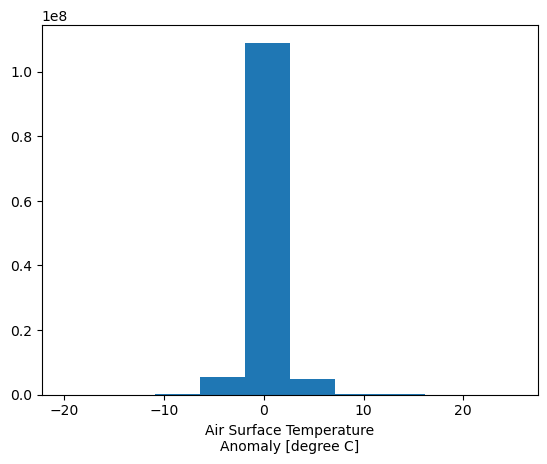

In [6]:
DS['temperature'].plot()
plt.show()

Here we see that `xarray`'s default plotting style for 3-D data is a histogram. Sometimes this default plot can be really helpful, othertimes it's less illustrative and suggests we need to look at the data in a different way. Here we can see that most of the `temperature` data, which is actually the surface temperature anomaly, is centered around $0^\circ$ C with some values as large a $\pm 20^\circ$ C. This is a good starting point, but let's look at smaller selections of the dataset, or subsets of the data, to get a better picture of what's in this 3-D dataset.

## Selecting from a single dimension
Let's start by selecting data along a single dimension and then plotting the subset. `xarray` has two built-in functions for selecting:
* `isel` which selects along a dimension using indecies of the coordinates
* `sel` which selects along a dimension using the values of the coordinates

Remember, this dataset has the dimensions `time`, `latitude`, and `longitude`. For now lets look at maps of surface temperature anomalies for individual points in the `time` dimension.

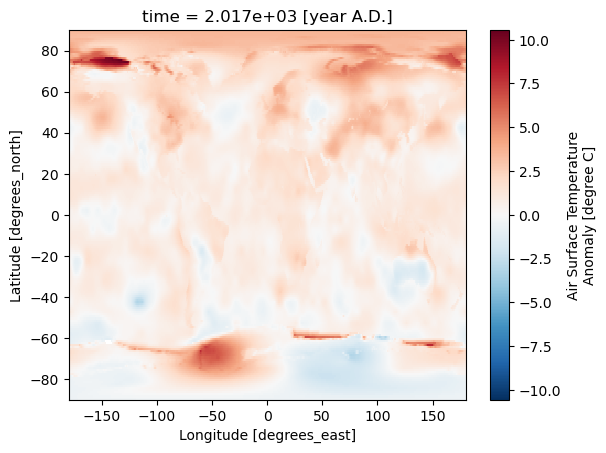

In [9]:
# use isel to select the 2001st point in time
DS['temperature'].isel(time=2000).plot()
plt.show()

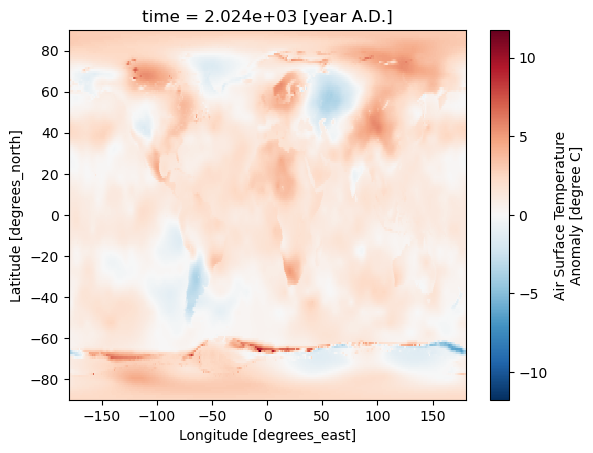

In [11]:
# use isel to select the last point in time
DS['temperature'].isel(time=-1).plot()
plt.show()

What do we notice about those two last plots? What year is each plot from? How do the colorbars compare to one another? Do the values have the same ranges?

Let's add some arguments to the function to change the plotting parameters so both plots have the same colorbar range.

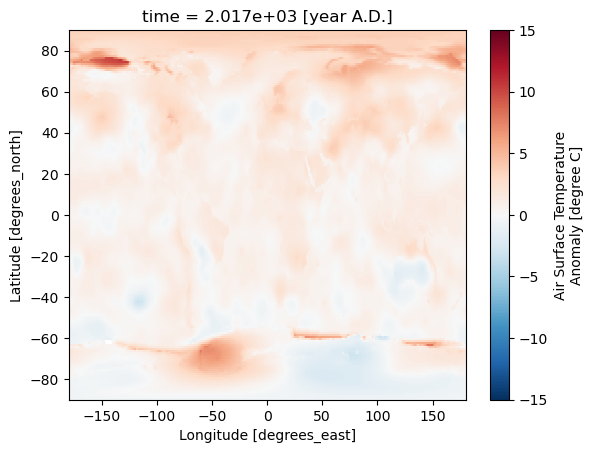

In [14]:
# use isel to select the 2001st point in time and a range of -15 to 15 C
DS['temperature'].isel(time=2000).plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.show()

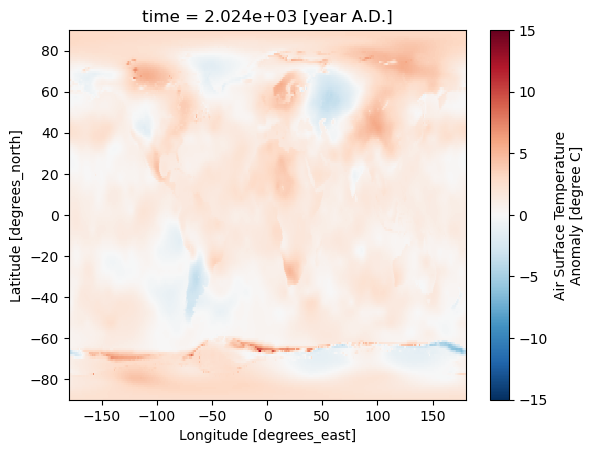

In [15]:
# use isel to select the last point in time and a range of -15 to 15 C
DS['temperature'].isel(time=-1).plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.show()

`isel` let us select a point in time just using the index value. But index values often don't mean much or hold much information. Let's use the other selecting function `sel` which selects data based on the values of the `coordinates`.

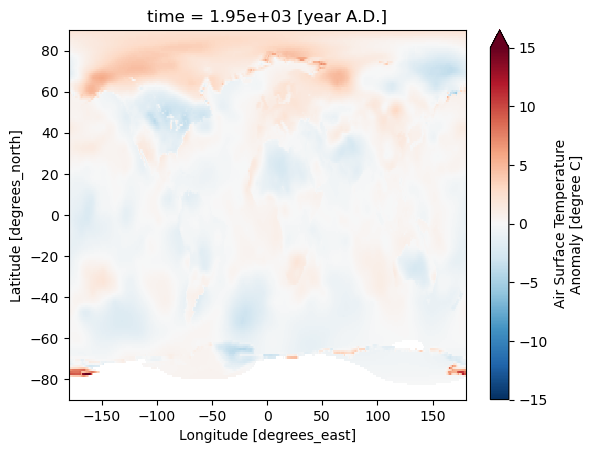

In [19]:
# use sel to select the point in time nearest to March 1950 and a range of -15 to 15 C
DS['temperature'].sel(time=(1950 + 2.5/12), method="nearest").plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.show()

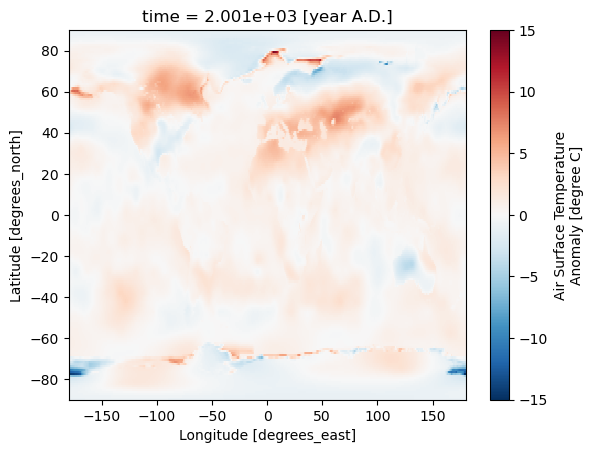

In [20]:
# use sel to select the point in time nearest to March 2001 and a range of -15 to 15 C
DS['temperature'].sel(time=(2001 + 2.5/12), method="nearest").plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.show()

We can also select data along one of the spatial dimensions (`latitude` or `longitude`).

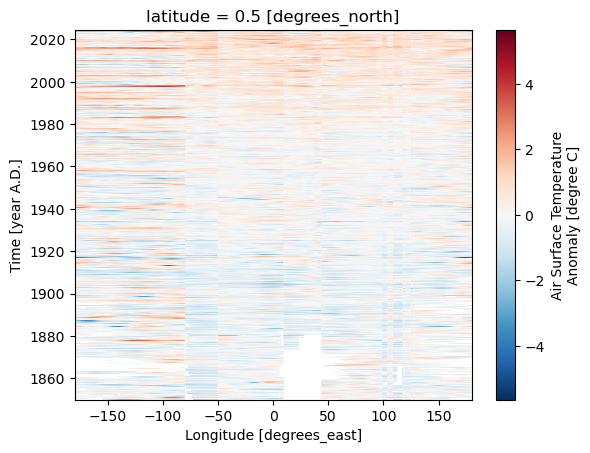

In [22]:
# use sel to select temperature near the equator
DS['temperature'].sel(latitude=0.5).plot()
plt.show()

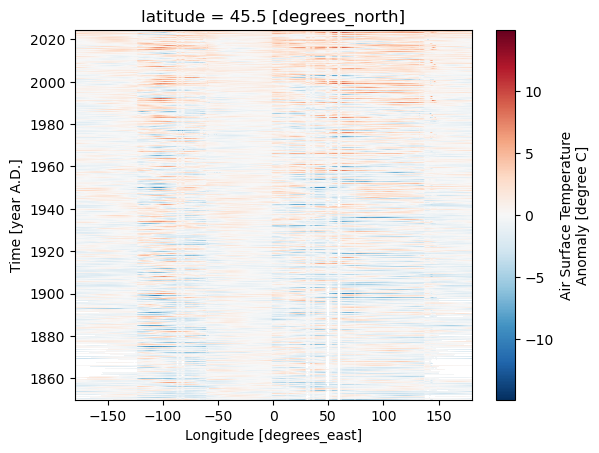

In [23]:
# use sel to select temperature in the Northern Hemisphere midlatitudes
DS['temperature'].sel(latitude=45.5).plot()
plt.show()

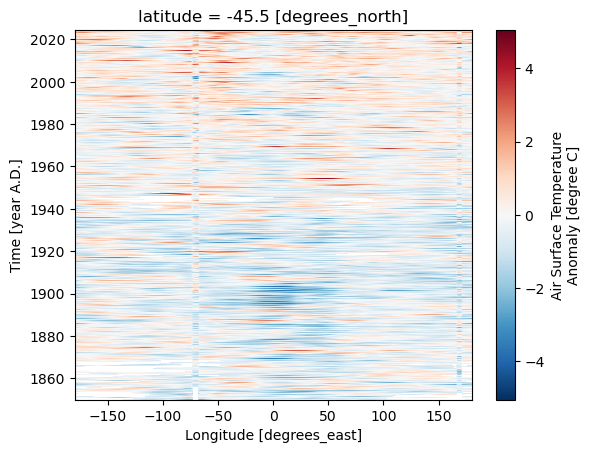

In [24]:
# use sel to select temperature in the Southern Hemisphere midlatitudes
DS['temperature'].sel(latitude=-45.5).plot()
plt.show()

This gives us a totally new way to look at out data! What if you want `time` on the y-axis to increase as you go down the axis?

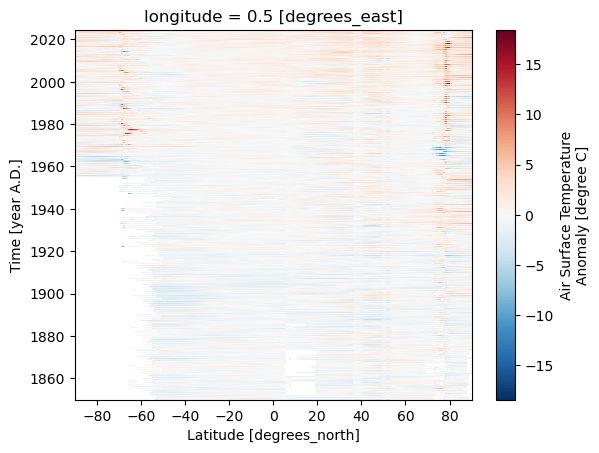

In [25]:
# use sel to select temperature in the Southern Hemisphere midlatitudes
DS['temperature'].sel(longitude=0.5).plot()
plt.show()

You can also select a value for the coordinate `longitude` and see a different view of the data.

In [ ]:
# use sel to select temperature a 0 degrees East

It's non-intuative to look at `latitude` on the x-axis, so let's tell `xarray` to make the x-axis the `time` dimension instead.

In [ ]:
# use sel to select temperature a 0 degrees East

In [ ]:
# use sel to select temperature a -100 degrees East (over the continental US)

## Selecting along multiple dimensions
We can look at even smaller subsets of data by selecting along two different dimensions. Here we'll briefly look at single points in sapce.

In [ ]:
# use sel to select temperature at -100 degrees East, 35 degrees North

In [ ]:
# use sel to select temperature at -100 degrees East, 35 degrees North and
# at 0 degrees East, 0 North

## Assignment

Look at [this map](https://gisgeography.com/wp-content/uploads/2023/01/World-Map-Latitude-Longitudes.jpg) with overlaid latitude and longitude coordinates. Using the selecting methods that we've explored today, create an example comparison of temperatures over land compared to over the ocean. You can do this with line plots, heatmaps, or even a histogram (use this version of the plotting function `.plot.hist()`).